In [1]:
#  schro - Program to solve the Schrodinger equation 
#  for a free particle using the Crank-Nicolson scheme

# Set up configuration options and special features
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#* Initialize parameters (grid spacing, time step, etc.)
i_imag = 1j             # Imaginary i
N = input('Enter number of grid points: ');
L = 100.                # System extends from -L/2 to L/2
h = L/(N-1)             # Grid size
x = np.arange(N)*h - L/2.  # Coordinates  of grid points
h_bar = 1.              # Natural units
mass = 1.               # Natural units
tau = input('Enter time step: ')

Enter number of grid points: 500
Enter time step: 1.


In [3]:
#* Set up the Hamiltonian operator matrix
ham = np.zeros((N,N))     # Set all elements to zero
coeff = -h_bar**2/(2*mass*h**2)
for i in range(1,N-1) :
    ham[i,i-1] = coeff
    ham[i,i] = -2*coeff   # Set interior rows
    ham[i,i+1] = coeff

# First and last rows for periodic boundary conditions
ham[0,-1] = coeff;   ham[0,0] = -2*coeff;     ham[0,1] = coeff
ham[-1,-2] = coeff;  ham[-1,-1] = -2*coeff;   ham[-1,0] = coeff

#* Compute the Crank-Nicolson matrix
dCN = np.dot( np.linalg.inv(np.identity(N) + .5*i_imag*tau/h_bar*ham), 
             (np.identity(N) - .5*i_imag*tau/h_bar*ham) )

In [4]:
#* Initialize the wavefunction 
x0 = 0.          # Location of the center of the wavepacket
velocity = 0.5   # Average velocity of the packet
k0 = mass*velocity/h_bar;       # Average wavenumber
sigma0 = L/10.   # Standard deviation of the wavefunction
Norm_psi = 1/(np.sqrt(sigma0*np.sqrt(np.pi)))   # Normalization
psi = np.empty(N,dtype=complex)
for i in range(N) :
    psi[i] = Norm_psi * np.exp(i_imag*k0*x[i]) * np.exp(-(x[i]-x0)**2/(2*sigma0**2))

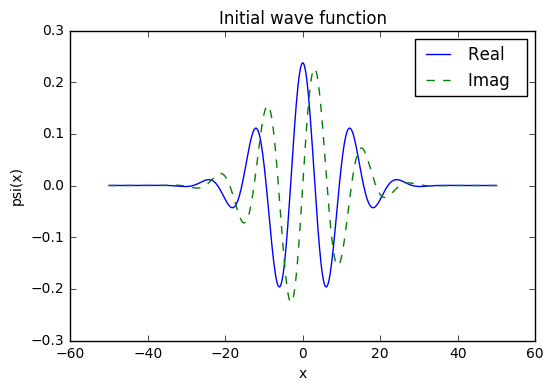

In [5]:
#* Plot the initial wavefunction
plt.plot(x,np.real(psi),'-',x,np.imag(psi),'--')
plt.xlabel('x');  plt.ylabel('psi(x)')
plt.legend(('Real  ','Imag  '))
plt.title('Initial wave function')

In [6]:
#* Initialize loop and plot variables 
max_iter = int(L/(velocity*tau)+.5)       # Particle should circle system
plot_iter = max_iter/20                   # Produce 20 curves
p_plot = np.empty((N,max_iter+1))         # Note that P(x,t) is real
p_plot[:,0] = np.absolute(psi[:])**2      # Record initial condition
iplot = 0
axisV = [-L/2., L/2., 0., max(p_plot[:,0])]   # Fix axis min and max

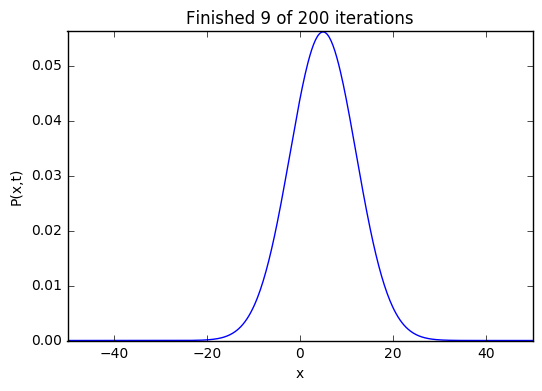

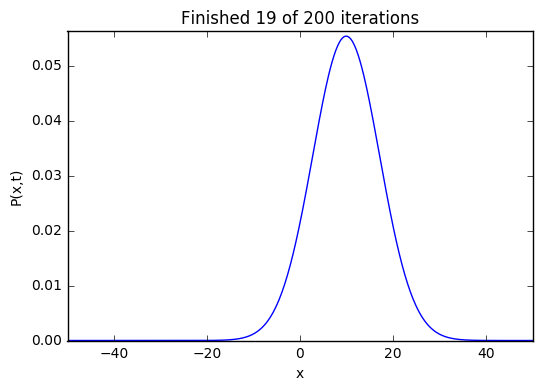

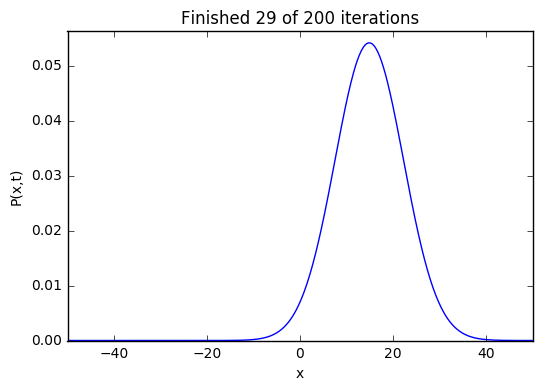

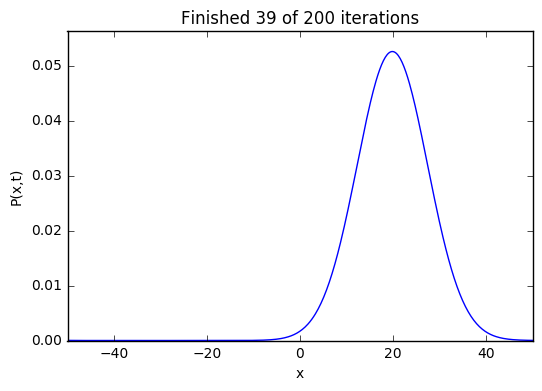

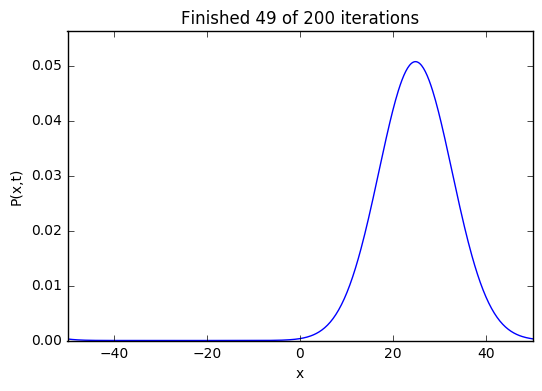

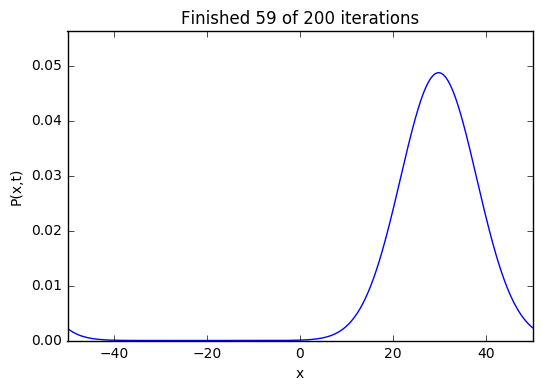

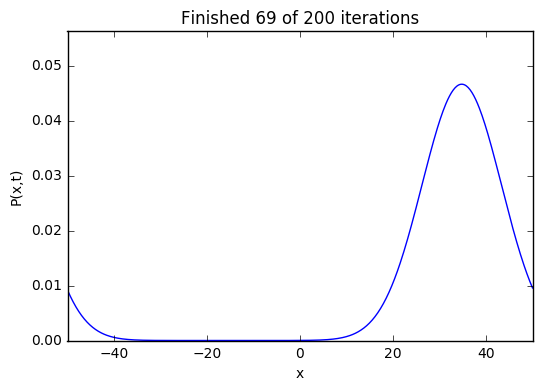

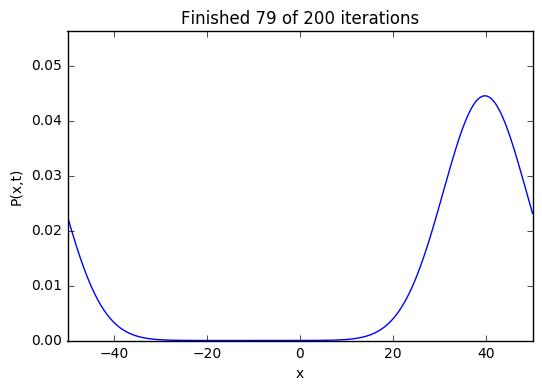

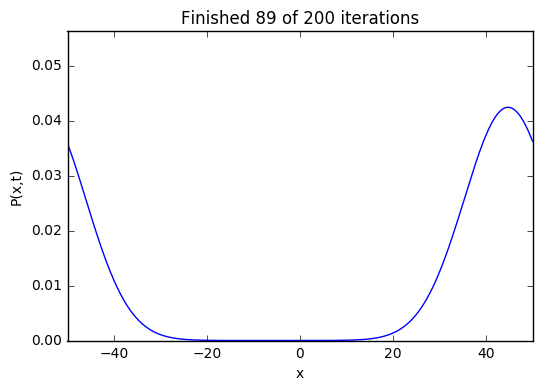

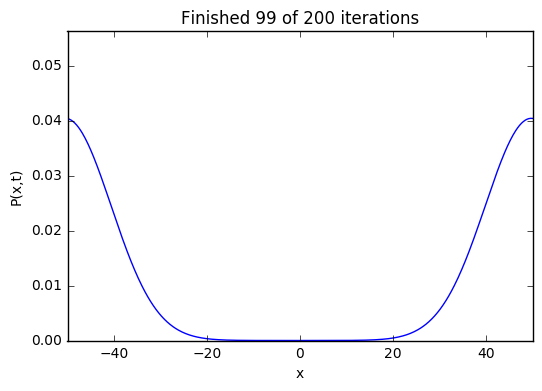

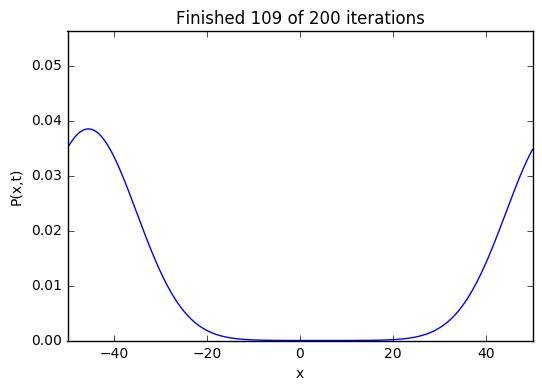

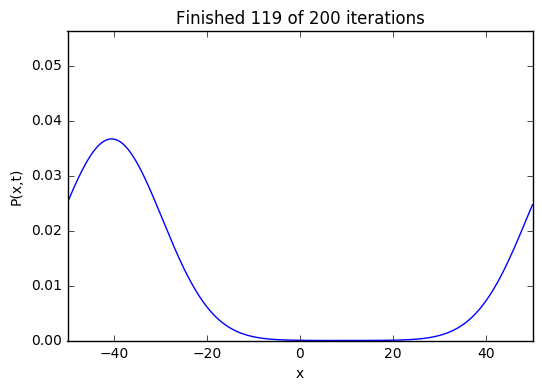

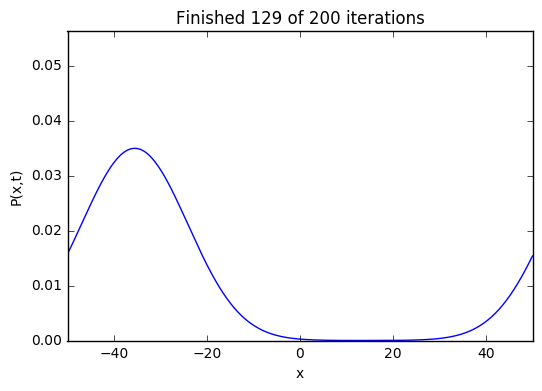

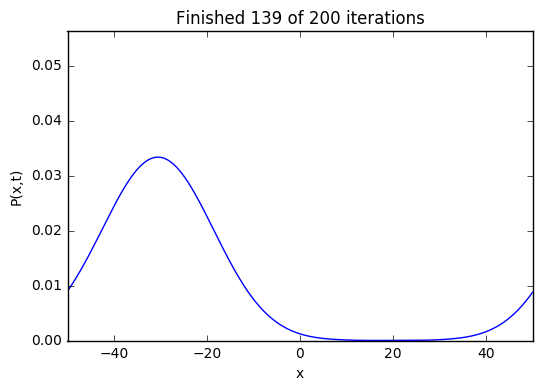

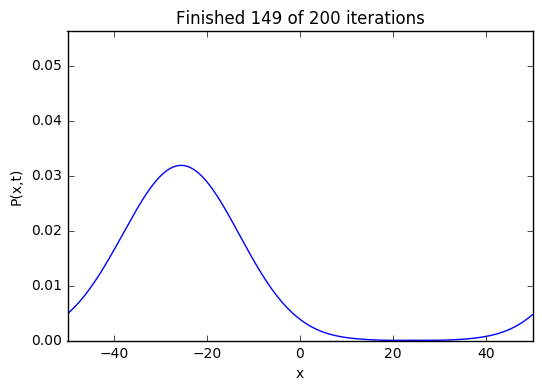

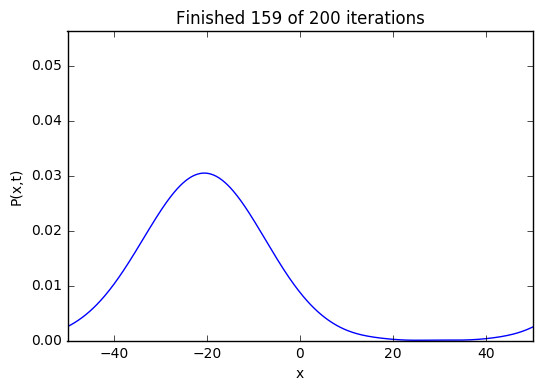

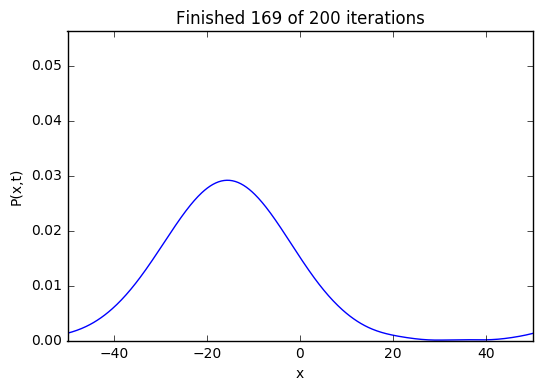

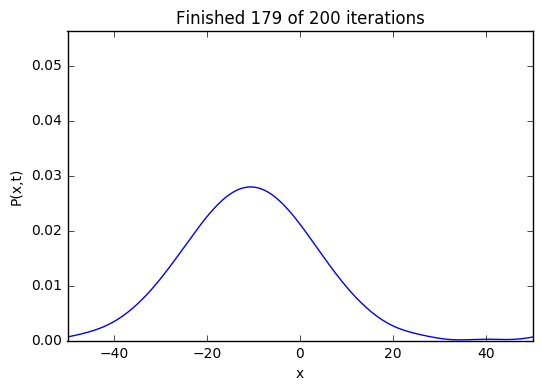

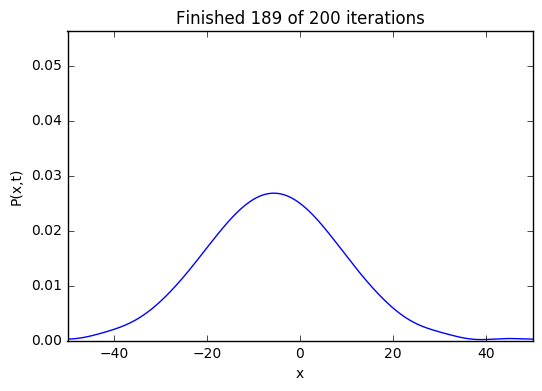

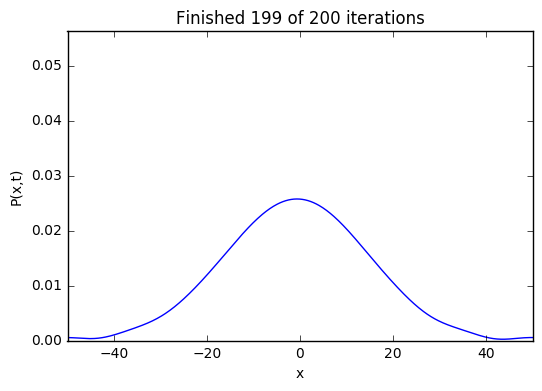

In [7]:
#* Loop over desired number of steps (wave circles system once)
for iter in range(max_iter) :

    #* Compute new wave function using the Crank-Nicolson scheme
    psi = np.dot(dCN,psi) 
  
    #* Periodically record values for plotting
    if (iter+1) % plot_iter < 1 :   
        iplot += 1
        p_plot[:,iplot] = np.absolute(psi[:])**2 
        plt.plot(x,p_plot[:,iplot]);     # Display snap-shot of P(x)
        plt.xlabel('x');   plt.ylabel('P(x,t)')
        plt.title('Finished %d of %d iterations' % (iter,max_iter))
        plt.axis(axisV)
        plt.show()

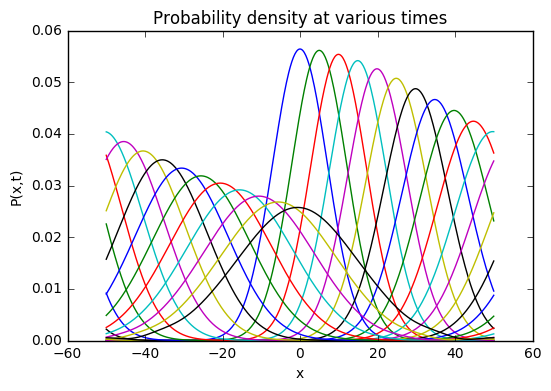

In [8]:
#* Plot probability versus position at various times
pFinal = np.empty(N)
pFinal = np.absolute(psi[:])**2
for i in range(iplot+1) :
    plt.plot(x,p_plot[:,i])
plt.xlabel('x'); plt.ylabel('P(x,t)')
plt.title('Probability density at various times')